In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt 
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import os

In [2]:
files = os.listdir('ssw_events_saved/')[-15:]

In [4]:
# Load all data into one dataframe
df_all = pd.DataFrame()
for file in files:
    df = pd.read_csv("ssw_events_saved/" + file)
    df = df.reset_index()
    df = df.sort_values(by='dates', ascending=True)
    df_all = pd.concat([df,df_all])

df_all = df_all.sort_values(by='dates', ascending=True)
df_all['index_'] = range(1, len(df_all) + 1)

# # load your time histories into a Pandas DataFrame
# df = pd.read_csv("ssw_events_saved/2009-01-24_ssw.csv")
df_all = df_all.drop(columns=['dates', 'index','SSW_flag'])

In [5]:
df_all

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,t_delta,index_
0,-9.761398,3.965770,228.112490,-4.880699,-20,1
1,-7.646122,3.315254,231.572296,-3.823061,-19,2
2,-7.834643,-2.608454,231.359944,-3.917321,-18,3
3,-5.044684,4.688290,231.504849,-2.522342,-17,4
4,-9.949104,-8.207887,234.183022,-4.974552,-16,5
...,...,...,...,...,...,...
36,11.150365,5.495300,209.798726,5.575182,16,611
37,11.202789,6.315737,209.202377,5.601394,17,612
38,11.870760,9.666916,208.848542,5.935380,18,613
39,12.457586,10.296061,207.264654,6.228793,19,614


In [6]:
df = df_all
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-50, 80],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[190, 250],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [7]:
avgs = df.mean()
devs = df.std()

for col in ['temperature_mean_selection', 'wind_eastward_mean_cos']:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

In [8]:
df = df_all
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [9]:
df = df.diff().dropna()
df['index_'] = range(1, len(df) + 1)


In [10]:
df

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,t_delta,index_
1,2.115276,-0.650517,0.255400,0.158683,1.0,1
2,-0.188520,-5.923707,-0.015676,-0.014142,1.0,2
3,2.789959,7.296744,0.010697,0.209296,1.0,3
4,-4.904421,-12.896177,0.197700,-0.367917,1.0,4
5,-4.413468,-13.802263,-0.397330,-0.331087,1.0,5
...,...,...,...,...,...,...
36,0.610234,-2.664265,-0.062993,0.045778,1.0,610
37,0.052424,0.820436,-0.044022,0.003933,1.0,611
38,0.667971,3.351179,-0.026120,0.050109,1.0,612
39,0.586826,0.629145,-0.116921,0.044022,1.0,613


In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['temperature_mean_selection'], name='Temperature Selection Mean', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



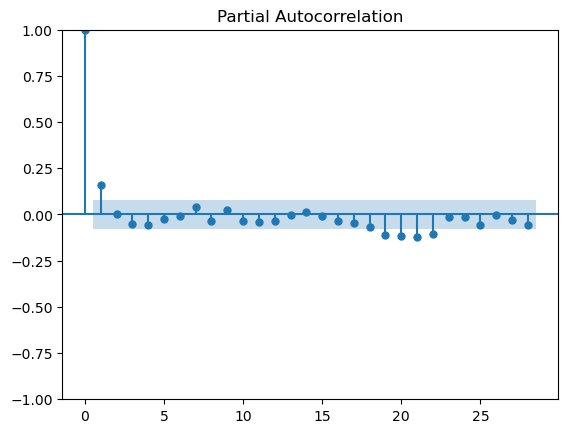

In [12]:
plot_pacf(df['wind_eastward_mean_cos'])
plt.show()

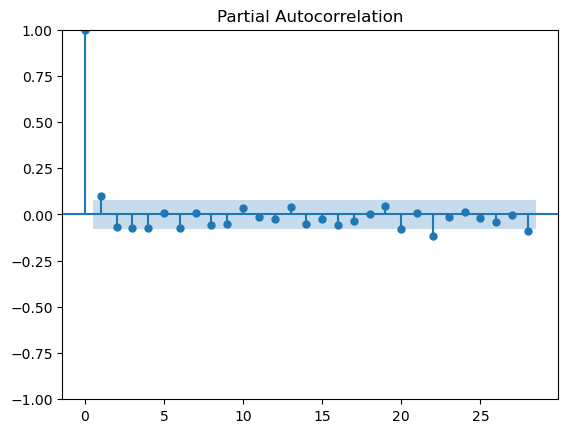

In [13]:
plot_pacf(df['temperature_mean_selection'])
plt.show()

In [14]:
for lag in range(1, 20):
    temp_series = df['temperature_mean_selection'].iloc[lag:]
    wind_series = df['wind_eastward_mean_cos'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(temp_series, wind_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.047121116896388995, pvalue=0.24404734370532288)
------
Lag: 2
PearsonRResult(statistic=0.054338162785739205, pvalue=0.17943533110473728)
------
Lag: 3
PearsonRResult(statistic=0.09294390489334879, pvalue=0.02157905084212795)
------
Lag: 4
PearsonRResult(statistic=0.05214188543171472, pvalue=0.19842803581748306)
------
Lag: 5
PearsonRResult(statistic=-0.024296717843655554, pvalue=0.5495403238055427)
------
Lag: 6
PearsonRResult(statistic=0.038224082453799046, pvalue=0.3467455573096688)
------
Lag: 7
PearsonRResult(statistic=-0.04692867775246942, pvalue=0.24831487544852868)
------
Lag: 8
PearsonRResult(statistic=0.05981867737822688, pvalue=0.14133510083621353)
------
Lag: 9
PearsonRResult(statistic=0.04119039615711629, pvalue=0.3117849253407053)
------
Lag: 10
PearsonRResult(statistic=-0.02743613557437051, pvalue=0.5009398656096683)
------
Lag: 11
PearsonRResult(statistic=0.008015265479073582, pvalue=0.8442829434068836)
------
Lag: 12
PearsonRResult(stat

In [15]:
df = df[['temperature_mean_selection', 'wind_eastward_mean_cos']]
model = VAR(df)
model_fit = model.fit(maxlags=11)
model_fit.summary()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, Apr, 2023
Time:                     17:04:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -3.92791
Nobs:                     603.000    HQIC:                  -4.13302
Log likelihood:          -379.732    FPE:                  0.0140711
AIC:                     -4.26371    Det(Omega_mle):       0.0130561
--------------------------------------------------------------------
Results for equation temperature_mean_selection
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                 -0.001077         0.014989           -0.072           0.943
L1.temperature_mean_selection          0.163250         0.049787     

In [16]:
df

,temperature_mean_selection,wind_eastward_mean_cos
1,0.255400,0.158683
2,-0.015676,-0.014142
3,0.010697,0.209296
4,0.197700,-0.367917
5,-0.397330,-0.331087
...,...,...
36,-0.062993,0.045778
37,-0.044022,0.003933
38,-0.026120,0.050109
39,-0.116921,0.044022
